# Classification

There is something wrong with my installation of Torch vision so I am completing this on Colab

In [ ]:
import sklearn

In [ ]:
from sklearn.datasets import make_circles


n_samples = 1000

X , y = make_circles(n_samples,
                     noise=0.03,
                     random_state=42)

In [ ]:
len(X), len(y)

(1000, 1000)

In [ ]:
print(f'First 5 samples of X:\n {X[:5]}')
print(f'First 5 samples of y:\n {y[:5]}')

First 5 samples of X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
First 5 samples of y:
 [1 1 1 1 0]


In [ ]:
import pandas as pd

circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "label":y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [ ]:
import matplotlib.pyplot as plt

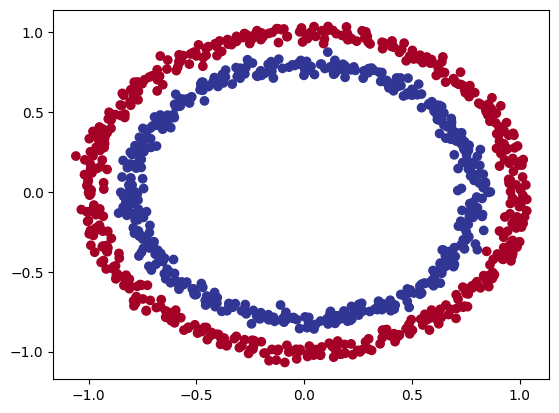

In [ ]:
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

# Check input and output shapes

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# view the first example of features and labels

X_sample = X[0]
y_sample = y[0]

print(f'Values for one sample of X: {X_sample} and the same for y: {y_sample}')
print(f'Shapes for one sample of X: {X_sample.shape} and y: {y_sample.shape}')


Values for one sample of X: [0.75424625 0.23148074] and the same for y: 1
Shapes for one sample of X: (2,) and y: ()


two features of x tyring to predict one output for y
the reason for the y () above is because it is a scalar and so has not shape

In [ ]:
import torch

In [ ]:
#turn data into tensors

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [ ]:
#Split data into training and test sets

from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test, y_train,y_test = train_test_split(X,
                                                  y,
                                                  test_size=0.2,
                                                  random_state=42)

In [ ]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## Building a model
* Setup device agnostic code
* Construct a model by subclassing nn.Module
* Define loss function and optimizer
* Create a training and test loop


In [ ]:
import torch
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

device

'cuda'

In [ ]:
class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # create two linear layers to handle the shape of our X_train data
        self.layer_1 = nn.Linear(in_features=2,
                                  out_features=5)
        self.layer_2 = nn.Linear(in_features=5,
                                 out_features=1)

    def forward(self,x):
        # x --> layer1 --> layer2 --> output
        return self.layer_2(self.layer_1(x))

model_0 = CircleModelV1().to(device)
model_0


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
# Doing the above but in a simpler way using Sequential

model_1 = nn.Sequential(
    nn.Linear(in_features=2,out_features=5),
    nn.Linear(in_features=5, out_features=1),
).to(device)

model_1


Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [ ]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[-0.2435, -0.3386],
                      [-0.5755,  0.5929],
                      [-0.2830,  0.1874],
                      [-0.2453,  0.0575],
                      [ 0.6592,  0.3258]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.6128,  0.2807,  0.6712,  0.1860,  0.4741], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.4409, -0.0685,  0.0928, -0.3108, -0.0922]], device='cuda:0')),
             ('layer_2.bias', tensor([0.3312], device='cuda:0'))])

In [ ]:
#  Make some predictions
with torch.inference_mode():
    untrained_preds = model_0(X_test.to(device))
print(f'Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}')
print(f'Length of test samples: {len(X_test)}, Shape: {X_test.shape}')
print(f'\n First 10 predictions:\n {untrained_preds[:10]}')
print(f'\n First 10 lables:\n{y_test[:10]}')

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200, 2])

 First 10 predictions:
 tensor([[-0.1184],
        [-0.2102],
        [ 0.1272],
        [-0.1880],
        [ 0.1348],
        [ 0.0787],
        [-0.1860],
        [-0.1183],
        [ 0.1265],
        [-0.2163]], device='cuda:0')

 First 10 lables:
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


In [ ]:
# The model is rubbish so far so ignore the cell above

In [ ]:
# Picking a loss function and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)

In [12]:
# Calculate accuracy - what percentage of the model is correct

def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc= (correct / len(y_pred)) * 100
    return acc

# Train the model

To trian our model we're going to need to build hte training loop with the following steps:

1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward (backpropagation)
5. Optimizer step (gradient descent)




Going from raw logits --> prediciton probabilities --> prediction labels

Our mode outputs are going to be raw **logits**.

We can convert these logits into prediction probabilities by passing them to some kind of activation function (e.g sigmoid for binary classification and softmax for multiclass classification).

Then we convery our model prediction probabilities to predication labels by either rounding them or taking the argmax().

In [ ]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.1184],
        [-0.2102],
        [ 0.1272],
        [-0.1880],
        [ 0.1348]], device='cuda:0')

In [ ]:
# Use sigmoid on our model logits, the model produces something that does not equate to our test y labels

y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

# passing the logits through the activation function gets us raw probabilties


tensor([[0.4704],
        [0.4476],
        [0.5318],
        [0.4531],
        [0.5337]], device='cuda:0')

For our prediction probability values, we need to perform a range style rounding on them:

* `y_pred_probs` >= 0.5 `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [ ]:
# All together

y_preds = torch.round(y_pred_probs)

y_pred_labels = torch.round(torch.sigmoid(model_0(X_test.to(device))[:5]))

print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()



tensor([True, True, True, True, True], device='cuda:0')


tensor([0., 0., 1., 0., 1.], device='cuda:0')

Time stamp 10hr 25mins


In [ ]:
# Building a building and training loop

torch.manual_seed(42)
torch.cuda.manual_seed(42) #this is if you are using a GPU

epochs = 1000

X_train, y_train = X_train.to(device),y_train.to(device)
X_test, y_test = X_test.to(device),y_test.to(device)

for epoch in range(epochs):
    model_0.train()

    y_logits = model_0(X_train).squeeze()

    y_pred = torch.round(torch.sigmoid(y_logits)) #turn pred probs into pred labels

    loss = loss_fn(y_logits,
                   y_train) #nn.BCEWithLogitsLoss expects logits as input
    acc = accuracy_fn(y_true= y_train,
                      y_pred= y_pred)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    model_0.eval()
    with torch.inference_mode():
        test_logits = model_0(X_test).squeeze()

        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits,
                            y_test)

        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    if epoch % 10 == 0:
        print(f'Epoch: {epoch: .5f}  |  Loss: {loss: .5f}, Acc: {acc:.2f}%  |  Test Loss: {test_loss: .5f}  |  Test ac: {test_acc: .2f}% ')


Epoch:  0.00000  |  Loss:  0.69728, Acc: 48.75%  |  Test Loss:  0.69062  |  Test ac:  54.00% 
Epoch:  10.00000  |  Loss:  0.69721, Acc: 48.75%  |  Test Loss:  0.69061  |  Test ac:  54.00% 
Epoch:  20.00000  |  Loss:  0.69714, Acc: 48.62%  |  Test Loss:  0.69061  |  Test ac:  54.00% 
Epoch:  30.00000  |  Loss:  0.69707, Acc: 48.75%  |  Test Loss:  0.69060  |  Test ac:  54.00% 
Epoch:  40.00000  |  Loss:  0.69701, Acc: 48.38%  |  Test Loss:  0.69060  |  Test ac:  54.50% 
Epoch:  50.00000  |  Loss:  0.69694, Acc: 48.38%  |  Test Loss:  0.69060  |  Test ac:  54.50% 
Epoch:  60.00000  |  Loss:  0.69688, Acc: 48.38%  |  Test Loss:  0.69060  |  Test ac:  54.50% 
Epoch:  70.00000  |  Loss:  0.69683, Acc: 48.50%  |  Test Loss:  0.69060  |  Test ac:  54.50% 
Epoch:  80.00000  |  Loss:  0.69677, Acc: 48.62%  |  Test Loss:  0.69060  |  Test ac:  54.50% 
Epoch:  90.00000  |  Loss:  0.69671, Acc: 48.62%  |  Test Loss:  0.69060  |  Test ac:  54.50% 
Epoch:  100.00000  |  Loss:  0.69666, Acc: 49.00%  

Our model is not learning, we need to make some predictions and make them visual.

To do this we will use `plot decision boundary` which is saved on the github of the course.


In [27]:
import requests
from pathlib import Path

#Download helper functions from Learn PyTorch repo if it is not already downloaded

if Path("helper_functions.py").is_file():
    print("helper_function.py already exists, skipping download")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/abinghamwalker/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary




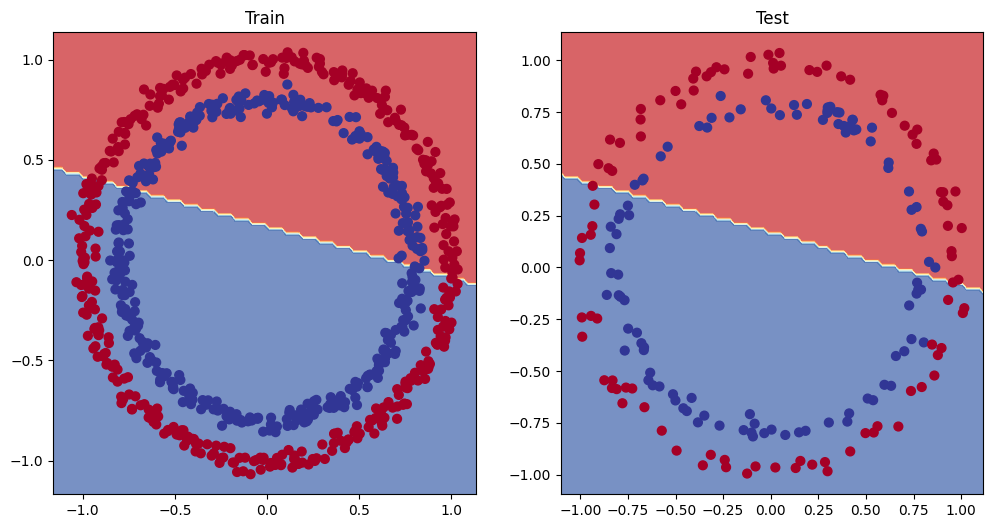

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

Video time stamp is 10hrs 57 mins

# Improving a model

* First we are going to add more layers and more hidden units.

In [ ]:
class CircleModuleV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2,out_features=10)
    self.layer_2 = nn.Linear(in_features=10,out_features=10)
    self.layer_3 = nn.Linear(in_features=10,out_features=1)

  def forward(self,x):
    return self.layer_3(self.layer_2(self.layer_1(x)))

model_2 = CircleModuleV2().to(device)
model_2.state_dict()


OrderedDict([('layer_1.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('layer_1.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                      [-0.3130, -0.122

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_2.train()
  y_logits = model_2(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_2.eval()
  with torch.inference_mode():
    test_logits = model_2(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69685, Acc: 51.50% | Test loss: 0.69471, Test acc: 55.00%
Epoch: 100 | Loss: 0.69326, Acc: 49.38% | Test loss: 0.69375, Test acc: 50.00%
Epoch: 200 | Loss: 0.69301, Acc: 50.50% | Test loss: 0.69422, Test acc: 47.50%
Epoch: 300 | Loss: 0.69298, Acc: 51.38% | Test loss: 0.69449, Test acc: 47.00%
Epoch: 400 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69461, Test acc: 45.50%
Epoch: 500 | Loss: 0.69298, Acc: 51.25% | Test loss: 0.69465, Test acc: 46.00%
Epoch: 600 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69467, Test acc: 46.00%
Epoch: 700 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 800 | Loss: 0.69298, Acc: 51.12% | Test loss: 0.69468, Test acc: 46.00%
Epoch: 900 | Loss: 0.69298, Acc: 51.00% | Test loss: 0.69468, Test acc: 46.00%


This has not improved anything adding another layer so we will have to try again but with more layers again.

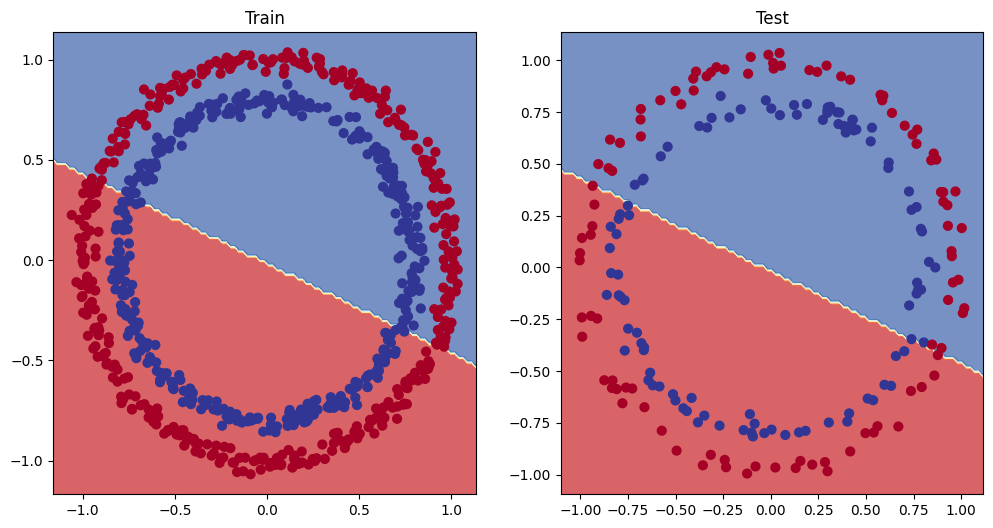

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_2, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_2, X_test, y_test)

Now going to create a linear data set like in the chapter before to see if this model actually works with linear data.

In [ ]:
# Create some data using the linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.01

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(dim=1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0100],
         [0.0200],
         [0.0300],
         [0.0400],
         [0.0500],
         [0.0600],
         [0.0700],
         [0.0800],
         [0.0900]]),
 tensor([[0.3000],
         [0.3070],
         [0.3140],
         [0.3210],
         [0.3280],
         [0.3350],
         [0.3420],
         [0.3490],
         [0.3560],
         [0.3630]]))

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)


(80, 80, 20, 20)

In [ ]:
X_train.cpu
y_train.cpu
X_test.cpu
y_test.cpu

<function Tensor.cpu>

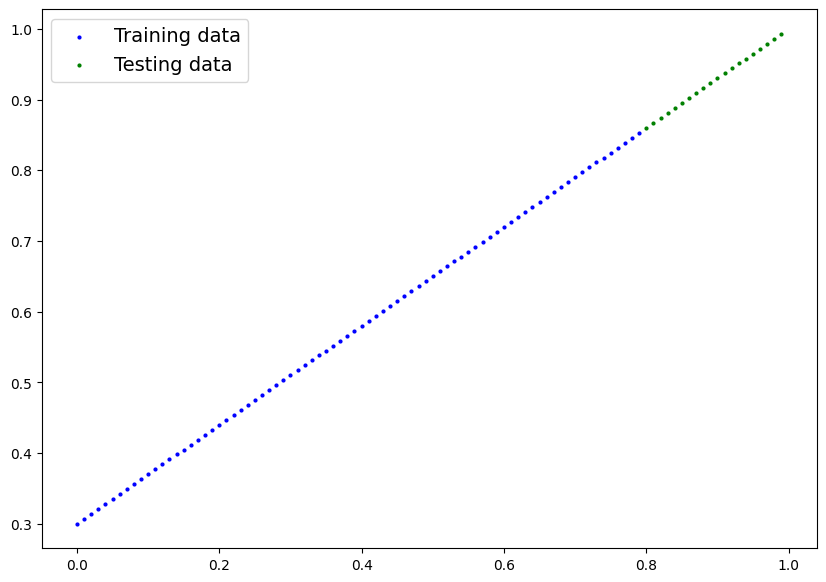

In [ ]:
plot_predictions(train_data=X_train,
                 train_labels=y_train,
                 test_data=X_test,
                 test_labels=y_test);

In [ ]:
model_3 = nn.Sequential(
    nn.Linear(in_features=1,out_features=10),
    nn.Linear(in_features=10,out_features=10),
    nn.Linear(in_features=10,out_features=1),
).to(device)

model_3

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_3.parameters(),
                            lr=0.01)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):

  y_pred = model_3(X_train)

  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_3.eval()
  with torch.inference_mode():
    test_pred = model_3(X_test)
    test_loss = loss_fn(test_pred,
                        y_test)

  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f} | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.75986 | Test loss: 0.91103
Epoch: 100 | Loss: 0.02858 | Test loss: 0.00081
Epoch: 200 | Loss: 0.02533 | Test loss: 0.00209
Epoch: 300 | Loss: 0.02137 | Test loss: 0.00305
Epoch: 400 | Loss: 0.01964 | Test loss: 0.00341
Epoch: 500 | Loss: 0.01940 | Test loss: 0.00387
Epoch: 600 | Loss: 0.01903 | Test loss: 0.00379
Epoch: 700 | Loss: 0.01878 | Test loss: 0.00381
Epoch: 800 | Loss: 0.01840 | Test loss: 0.00329
Epoch: 900 | Loss: 0.01798 | Test loss: 0.00360


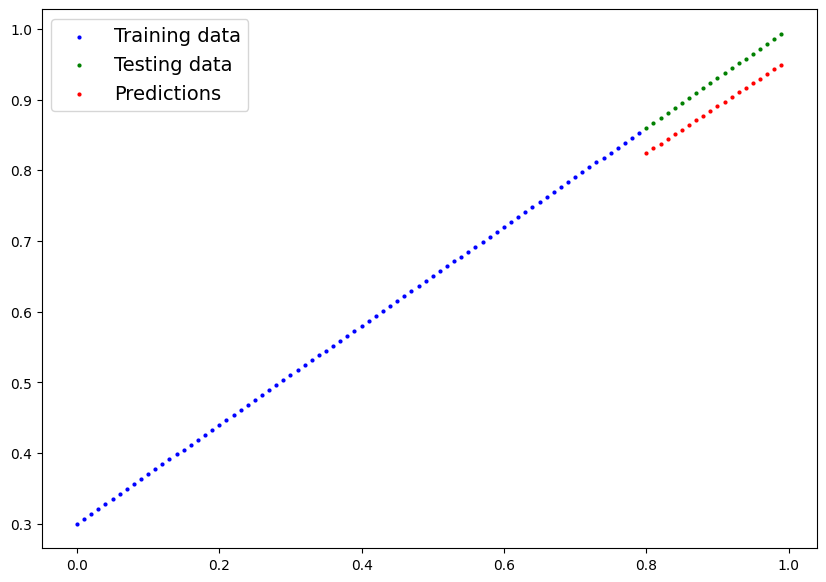

In [ ]:
model_3.eval()
with torch.inference_mode():
    y_preds = model_3(X_test)

# Plot data and predictions
plot_predictions(train_data=X_train.cpu(),
                 train_labels=y_train.cpu(),
                 test_data=X_test.cpu(),
                 test_labels=y_test.cpu(),
                 predictions=y_preds.cpu());

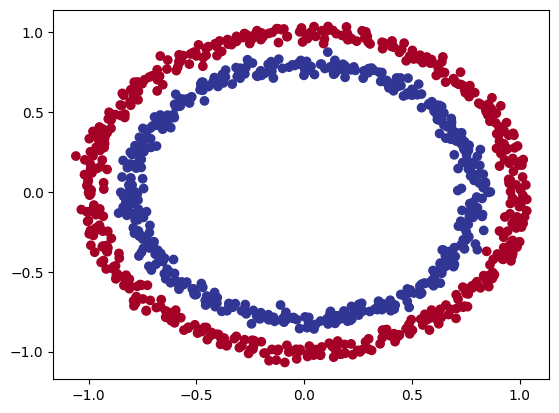

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles

n_sample =1000

X, y = make_circles(n_sample,
                    noise=0.03,
                    random_state=42)

plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu)

In [ ]:
import torch
from sklearn.model_selection import train_test_split

X = torch.from_numpy(X).type(torch.float)
y= torch.from_numpy(y).type(torch.float)

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)




In [ ]:
X_train[:5],y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

In [ ]:
from torch import nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

class CircleModelV4(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU()

  def forward(self, x):
      return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))


model_4 = CircleModelV4().to(device)
model_4

CircleModelV4(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [ ]:

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_4.parameters(),
                            lr=0.1)

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 10000

X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

for epoch in range(epochs):
  model_4.train()
  y_logits = model_4(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits))

  loss = loss_fn(y_logits, y_train)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_4.eval()
  with torch.inference_mode():
    test_logits = model_4(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  if epoch % 1000 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69295, Acc: 50.00% | Test loss: 0.69319, Test acc: 50.00%
Epoch: 1000 | Loss: 0.56818, Acc: 87.75% | Test loss: 0.57378, Test acc: 86.50%
Epoch: 2000 | Loss: 0.04176, Acc: 99.88% | Test loss: 0.06583, Test acc: 100.00%
Epoch: 3000 | Loss: 0.01672, Acc: 99.88% | Test loss: 0.03363, Test acc: 100.00%
Epoch: 4000 | Loss: 0.01048, Acc: 100.00% | Test loss: 0.02451, Test acc: 99.50%
Epoch: 5000 | Loss: 0.00765, Acc: 100.00% | Test loss: 0.01993, Test acc: 99.50%
Epoch: 6000 | Loss: 0.00603, Acc: 100.00% | Test loss: 0.01726, Test acc: 99.50%
Epoch: 7000 | Loss: 0.00499, Acc: 100.00% | Test loss: 0.01557, Test acc: 99.50%
Epoch: 8000 | Loss: 0.00428, Acc: 100.00% | Test loss: 0.01451, Test acc: 99.50%
Epoch: 9000 | Loss: 0.00375, Acc: 100.00% | Test loss: 0.01374, Test acc: 99.50%


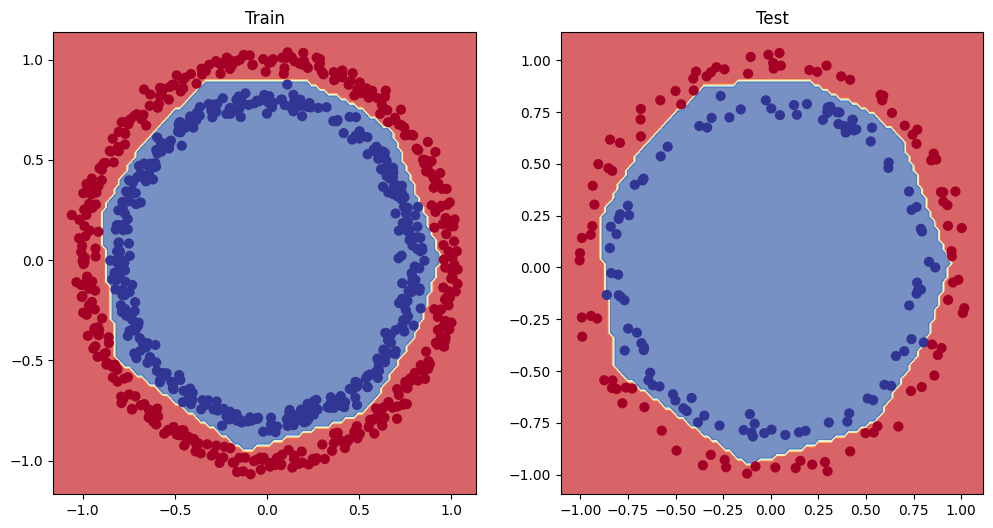

In [ ]:
# Plot decision boundary of the model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, y_test)

In [ ]:
A = torch.arange(-10,10,1.0)


In [ ]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

In [ ]:
A.dtype

torch.float32

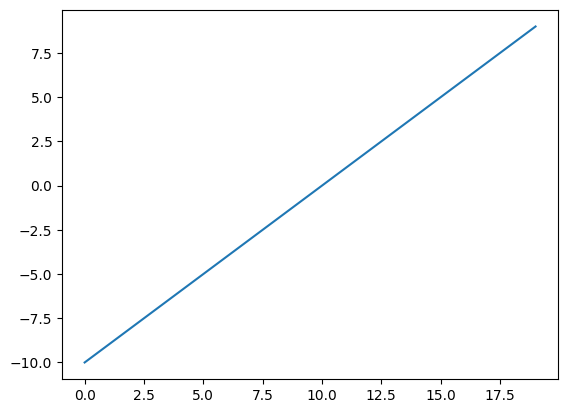

In [ ]:
plt.plot(A)

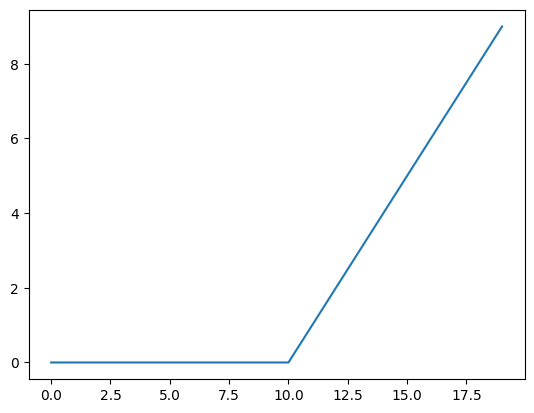

In [ ]:
plt.plot(torch.relu(A))

In [ ]:
def relu(x: torch.Tensor) -> torch.Tensor:
  return torch.maximum(torch.tensor(0),x)

relu(A)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6., 7.,
        8., 9.])

Lets recreate sigmoid

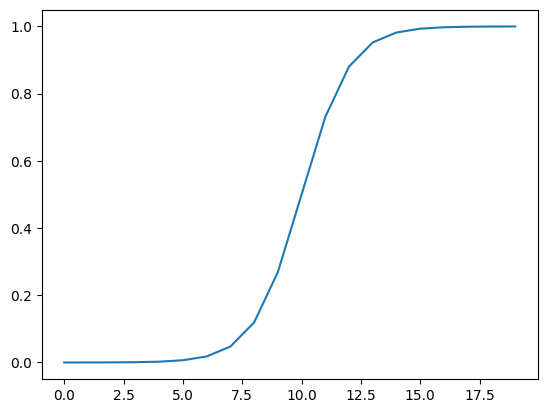

In [ ]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))

plt.plot(torch.sigmoid(A))

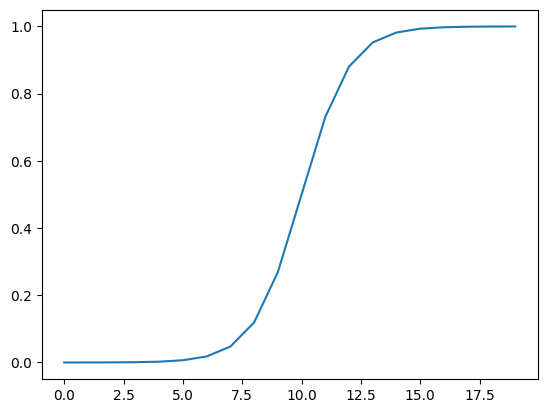

In [ ]:
plt.plot(sigmoid(A))

Time stamp 12 hrs 42mins

# Putting together a multi class problem

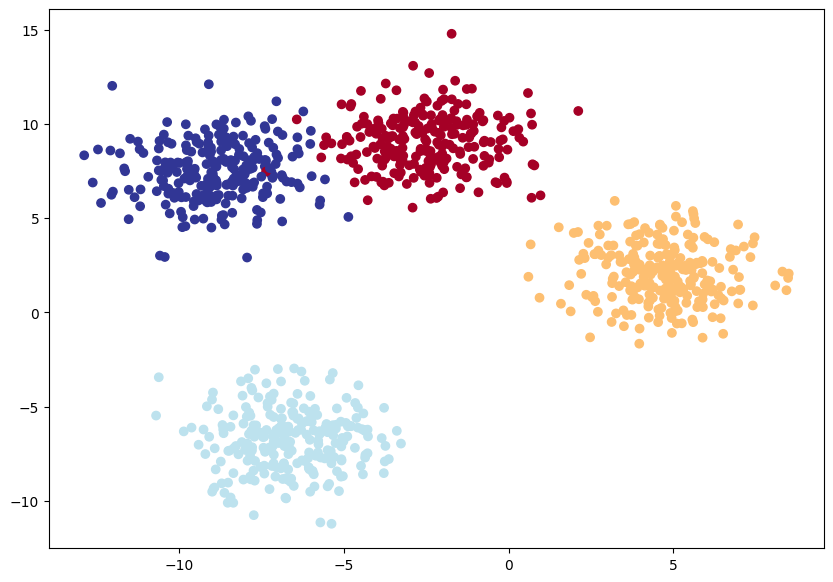

In [58]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation

NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create multi-class data

X_blob, y_blob = make_blobs(n_samples=1000,
                            n_features = NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std =1.5,
                            random_state=RANDOM_SEED)

# 2 Turn data into tensors

X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)

# 3. Split into train and test

X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
                                                                        y_blob,
                                                                        test_size = 0.2,
                                                                        random_state = RANDOM_SEED)

# 4.Plot data
plt.figure(figsize=(10,7))
plt.scatter(X_blob[:,0], X_blob[:,1], c=y_blob, cmap=plt.cm.RdYlBu)





Building a multi class classification model on the data above

In [59]:
# Create device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [60]:
# Build a multi class classification model

class BlobModel(nn.Module):
  def __init__(self, input_features, output_features, hidden_units=8):

    """Initialises multi class classification model.

    Args:
    input_features (int) : Number of input features to the model
    output_features (int): Number of output features (number of output classes)
    hidden_unit (int): Number of hidden units between layers, default 8
    """
    super().__init__()
    self.linear_layer_stack = nn.Sequential(
        nn.Linear(in_features=input_features, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units, out_features=hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_features)
    )

  def forward(self,x):
    return self.linear_layer_stack(x)

# Create an instance of the BlobModel and send it to the target device

model_5 = BlobModel(input_features=2,
                    output_features=4,
                    hidden_units=8).to(device)

model_5



BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [61]:
# Create a loss function and a optimizer

loss_fn = nn.CrossEntropyLoss()

optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr=0.1)

In [62]:
# Get prediction probabilities for a multi class PyTorch model

In [63]:

model_5.eval()

with torch.inference_mode():
  y_logits = model_5(X_blob_test.to(device))

y_logits[:10]


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834],
        [-0.1497, -1.0617, -0.7107, -0.1645],
        [ 0.1539, -0.2887,  0.1520, -0.0109],
        [-0.2154, -1.1795, -0.9300, -0.2745],
        [ 0.2443, -0.2472,  0.1649,  0.0061],
        [-0.2329, -1.2120, -0.9849, -0.3004]], device='cuda:0')

The output of this model is logits, we need to convert them into prediction probabilities and then labels.

In [64]:
y_pred_probs = torch.softmax(y_logits,dim=1)
print(y_logits[:5])
print(y_pred_probs[:5])


tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0')
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0')


In [65]:
y_preds = torch.argmax(y_pred_probs, dim=1)
y_preds

tensor([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 1, 0, 0, 0,
        0, 0, 0, 0, 3, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 1], device='cuda:0')

### Create a training and testing loop

In [66]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 100

X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
  model_5.train()
  y_logits= model_5(X_blob_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)
  loss = loss_fn(y_logits,y_blob_train)
  acc = accuracy_fn(y_true=y_blob_train,
                    y_pred=y_pred)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()


  model_5.eval()
  with torch.inference_mode():
    test_logits = model_5(X_blob_test)
    test_pred = torch.softmax(test_logits,dim=1).argmax(dim=1)
    test_loss = loss_fn(test_logits,
                        y_blob_test)
    test_acc = accuracy_fn(y_true = y_blob_test,
                           y_pred = test_pred)

    if epoch % 10 ==0:
      print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")


Epoch: 0 | Loss: 1.15883, Accuracy: 40.38% | Test loss: 1.07554, Test acc: 48.00%
Epoch: 10 | Loss: 0.64476, Accuracy: 96.75% | Test loss: 0.66069, Test acc: 97.50%
Epoch: 20 | Loss: 0.42535, Accuracy: 98.50% | Test loss: 0.43074, Test acc: 100.00%
Epoch: 30 | Loss: 0.25294, Accuracy: 99.12% | Test loss: 0.24508, Test acc: 99.50%
Epoch: 40 | Loss: 0.11232, Accuracy: 99.25% | Test loss: 0.10229, Test acc: 99.50%
Epoch: 50 | Loss: 0.06627, Accuracy: 99.25% | Test loss: 0.05848, Test acc: 99.50%
Epoch: 60 | Loss: 0.05068, Accuracy: 99.25% | Test loss: 0.04293, Test acc: 99.50%
Epoch: 70 | Loss: 0.04300, Accuracy: 99.25% | Test loss: 0.03491, Test acc: 99.50%
Epoch: 80 | Loss: 0.03836, Accuracy: 99.25% | Test loss: 0.02988, Test acc: 99.50%
Epoch: 90 | Loss: 0.03525, Accuracy: 99.25% | Test loss: 0.02663, Test acc: 99.50%


Video time stamp 13hrs 40mins, debugged my error !

In [67]:
model_5.eval()

with torch.inference_mode():
  y_logits = model_5(X_blob_test)

y_logits[:10]


tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [68]:
y_pred_probs = torch.softmax(y_logits,dim=1)
y_pred_probs[:10]

tensor([[1.3438e-03, 9.9865e-01, 1.2164e-06, 5.3854e-07],
        [4.9905e-03, 7.4740e-05, 1.0630e-03, 9.9387e-01],
        [1.3985e-03, 8.6060e-04, 9.9463e-01, 3.1073e-03],
        [4.7389e-03, 9.9483e-01, 3.1956e-04, 1.1353e-04],
        [9.9388e-01, 6.0966e-03, 2.4904e-06, 2.2378e-05],
        [1.3372e-03, 1.1504e-05, 3.0644e-04, 9.9834e-01],
        [2.9138e-03, 2.1537e-03, 9.8781e-01, 7.1181e-03],
        [9.9838e-01, 6.0198e-04, 3.4435e-05, 9.7989e-04],
        [2.8147e-04, 1.5016e-04, 9.9882e-01, 7.5044e-04],
        [9.9825e-01, 1.4575e-03, 1.5998e-05, 2.7210e-04]], device='cuda:0')

In [69]:
# Go from pred_probs to pred_labels

y_preds = torch.argmax(y_pred_probs,dim=1)
y_preds[:10]



tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

In [70]:
y_blob_test[:10]

tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')

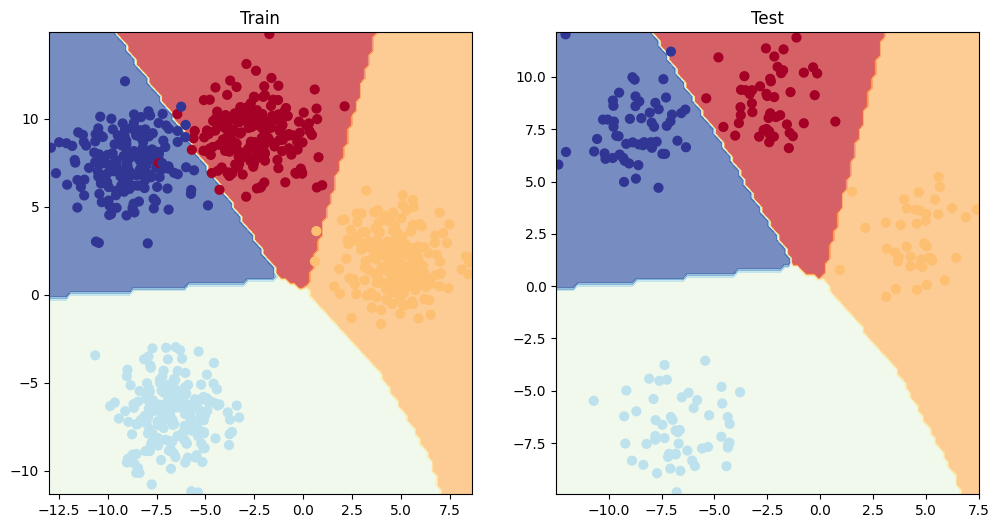

In [71]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_5,X_blob_train,y_blob_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_5,X_blob_test,y_blob_test)


In [72]:
!pip install torchmetrics


In [77]:
from torchmetrics import Accuracy

torchmetric_accuracy = Accuracy(task="multiclass", num_classes=4).to(device)

torchmetric_accuracy(y_preds,y_blob_test)


tensor(0.9950, device='cuda:0')

#### CODE NEEDED TO BE CHANGED FOR ACCURACY NOW